[필사 원본 링크](https://www.kaggle.com/code/sasha18/recommend-books-using-count-tfidf-on-titles) <br>
[코사인 유사도 관련 영상](https://www.youtube.com/watch?v=e9U0QAFbfLI&ab_channel=StatQuestwithJoshStarmer)
## 이 노트북을 선택한 이유
* 제목에 TFidf 가 눈에 가장 먼저 들어왔다.
* 관련 기억이 전혀 나지 않음
* 복습하기에 좋은 노트북이라고 판단

## Import packages and dataset

In [28]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
PATH = '/Users/jahyeon_gu/Downloads'

data = pd.read_csv(f"{PATH}/books.csv")
data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## 데이터 살펴보기 (프리스타일)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### 수치형 변수

In [4]:
data.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


### 범주형 변수

In [5]:
data.describe(include="O")

,isbn,authors,original_title,title,language_code,image_url,small_image_url
count,9300,10000,9415,10000,8916,10000,10000
unique,9300,4664,9274,9964,25,6669,6669
top,439023483,Stephen King,,Selected Poems,eng,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
freq,1,60,5,4,6341,3332,3332


### 결측치 조회

In [7]:
data.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

### language code

In [24]:
data['language_code']

0         eng
1         eng
2       en-US
3         eng
4         eng
        ...  
9995      eng
9996      eng
9997      eng
9998      eng
9999      NaN
Name: language_code, Length: 10000, dtype: object

Text(0.5, 1.0, 'language_code 개수')

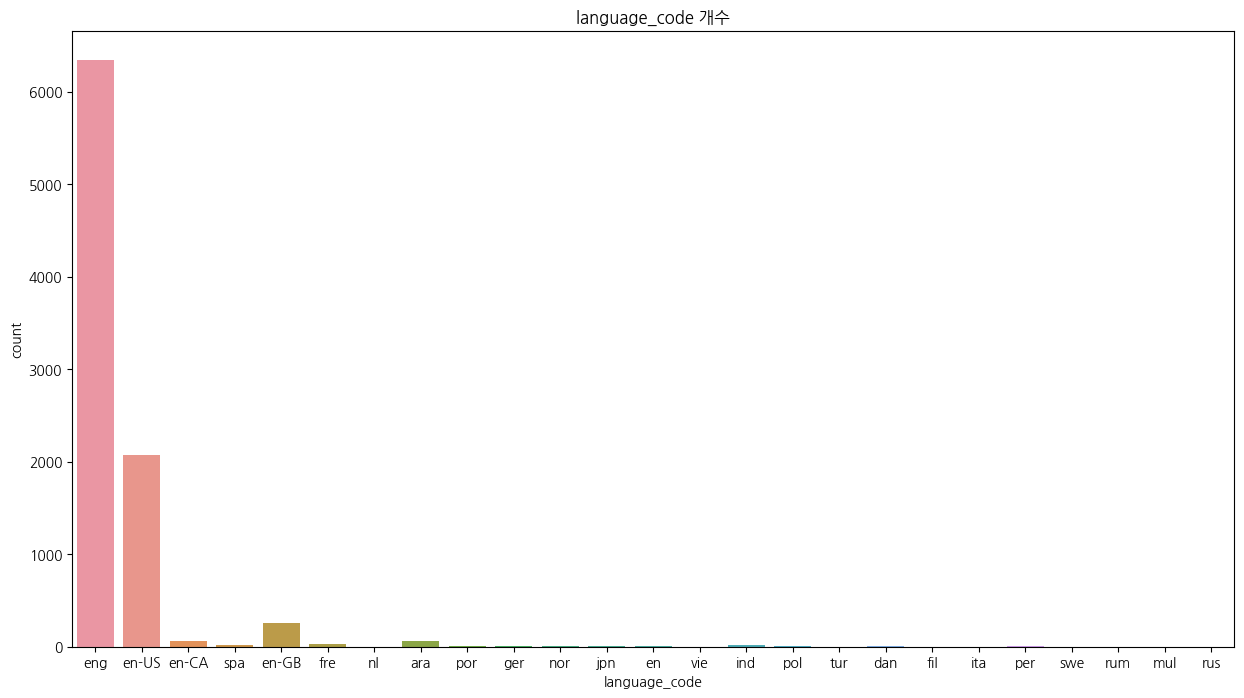

In [29]:
plt.figure(figsize=(15, 8))
sns.countplot(data, x='language_code').set_title("language_code 개수")

In [31]:
temp = data["language_code"]
temp

0         eng
1         eng
2       en-US
3         eng
4         eng
        ...  
9995      eng
9996      eng
9997      eng
9998      eng
9999      NaN
Name: language_code, Length: 10000, dtype: object

In [97]:
condition = data["language_code"].map(lambda x: True if x not in ['eng', 'en-US', 'en-CA', 'en-GB', 'en'] else False)
condition

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999     True
Name: language_code, Length: 10000, dtype: bool

In [102]:
temp2 = data.loc[condition]
temp2

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
44,45,4214,4214,1392700,264,770430074,9.780770e+12,Yann Martel,2001.0,Life of Pi,...,1003228,1077431,42962,39768,74331,218702,384164,360466,https://images.gr-assets.com/books/1320562005m...,https://images.gr-assets.com/books/1320562005s...
47,48,4381,4381,1272463,507,307347974,9.780307e+12,Ray Bradbury,1953.0,Fahrenheit 451,...,570498,1176240,30694,28366,64289,238242,426292,419051,https://images.gr-assets.com/books/1351643740m...,https://images.gr-assets.com/books/1351643740s...
83,84,7677,6424171,3376836,176,030734813X,9.780307e+12,Michael Crichton,1990.0,Jurassic Park,...,447833,650483,8143,15736,34222,138327,231583,230615,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
131,132,3431,3431,2561472,123,1401308589,9.781401e+12,Mitch Albom,2003.0,The Five People You Meet in Heaven,...,449501,474699,16682,12360,33669,107800,155830,165040,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
203,204,5326,5326,3097440,2380,1561797464,9.781562e+12,Charles Dickens,1843.0,A Christmas Carol,...,394540,441396,11568,6737,21415,93906,153823,165515,https://images.gr-assets.com/books/1406512317m...,https://images.gr-assets.com/books/1406512317s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,9974,116494,116494,827585,38,553153382,9.780553e+12,Lois Lowry,1978.0,Anastasia Krupnik,...,11914,12519,389,440,603,3062,4185,4229,https://images.gr-assets.com/books/1476942137m...,https://images.gr-assets.com/books/1476942137s...
9976,9977,202948,202948,851165,55,804113475,9.780804e+12,Anne Tyler,1995.0,Ladder of Years,...,11209,12229,949,214,854,3714,4827,2620,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9982,9983,8539798,8539798,8097499,16,2849659266,9.782850e+12,Kazue Kato,2009.0,青の祓魔師 2,...,8972,9859,153,32,152,1025,2479,6171,https://images.gr-assets.com/books/1278403940m...,https://images.gr-assets.com/books/1278403940s...
9985,9986,183092,183092,176939,16,310257689,9.780310e+12,Terri Blackstock,2006.0,Night Light: A Restoration Novel,...,8471,8862,218,96,172,1115,2658,4821,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


Text(0.5, 1.0, 'en 제외 언어 개수')

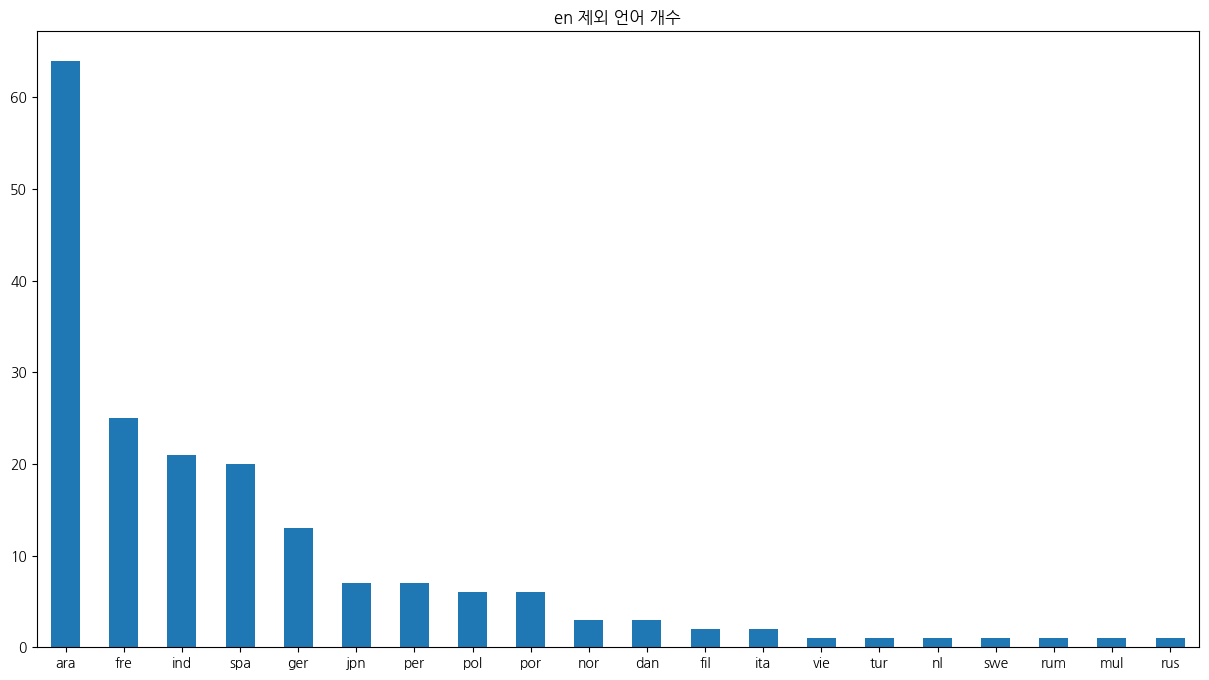

In [89]:
plt.figure(figsize=(15, 8))
temp2['language_code'].value_counts().plot(kind='bar', rot=0).set_title("en 제외 언어 개수")


In [104]:
temp2["language_code"].isnull().sum()

1084

In [107]:
lang_data = temp2['language_code'].value_counts()
lang_data

ara    64
fre    25
ind    21
spa    20
ger    13
jpn     7
per     7
pol     6
por     6
nor     3
dan     3
fil     2
ita     2
vie     1
tur     1
nl      1
swe     1
rum     1
mul     1
rus     1
Name: language_code, dtype: int64

In [130]:
lang_data.index

Index(['ara', 'fre', 'ind', 'spa', 'ger', 'jpn', 'per', 'pol', 'por', 'nor',
       'dan', 'fil', 'ita', 'vie', 'tur', 'nl', 'swe', 'rum', 'mul', 'rus'],
      dtype='object')

[색상 참고 자료](https://data101.oopy.io/4233e3f0-9ca1-41ad-bdd9-b3a26f7a2160)

Text(0.5, 1.0, 'en 제외 언어 개수')

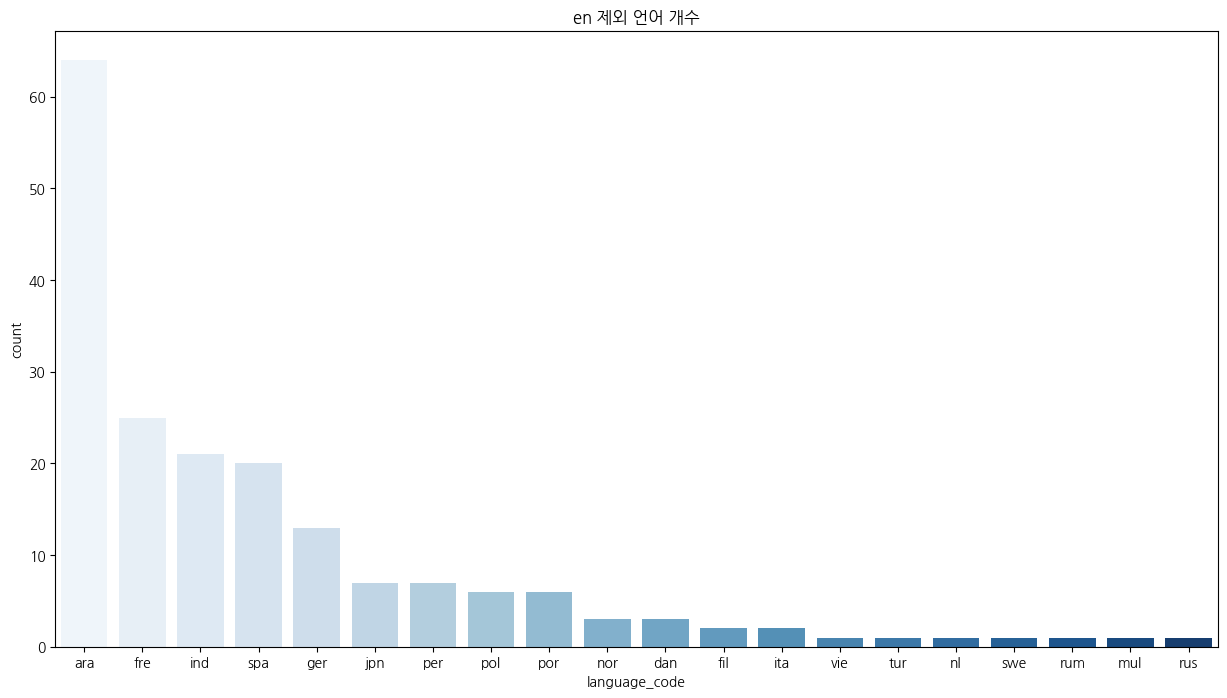

In [149]:
# 밝은 색부터 점점 어둡게
plt.figure(figsize=(15, 8))
sns.countplot(temp2, x='language_code', palette='Blues', order=lang_data.index).set_title("en 제외 언어 개수")

Text(0.5, 1.0, 'en 제외 언어 개수')

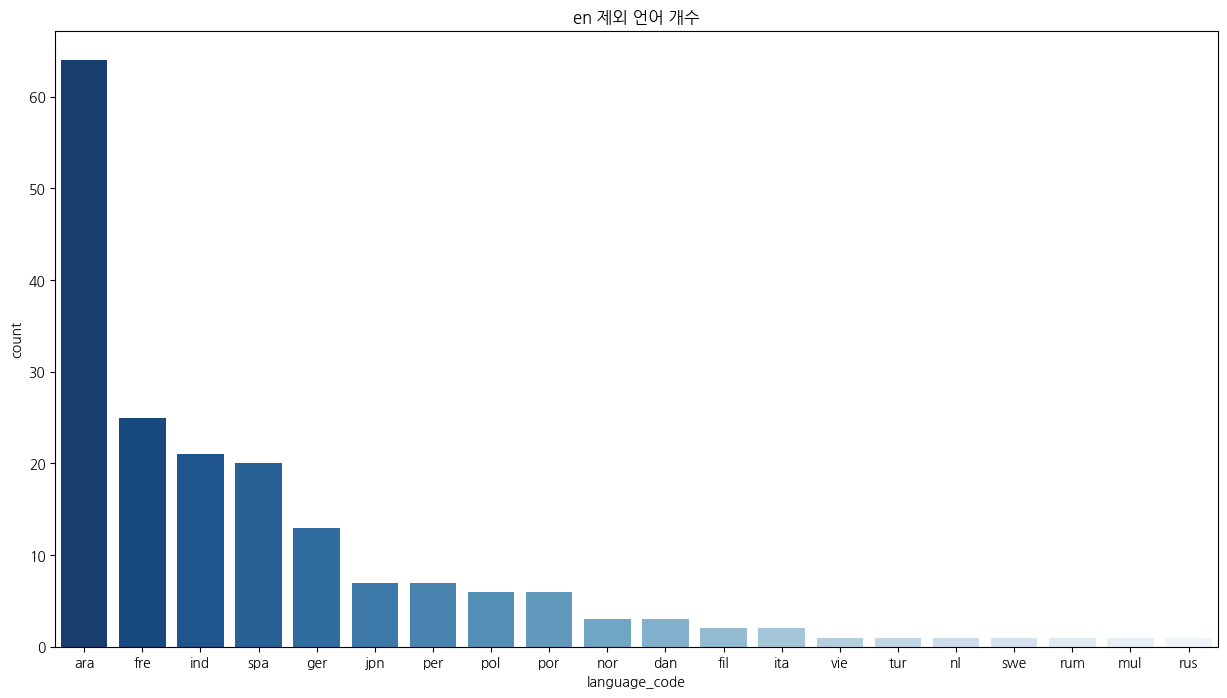

In [148]:
# 만약 어두운 색부터 점점 밝게 하고 싶다면 '색상_r'
plt.figure(figsize=(15, 8))
sns.countplot(temp2, x='language_code', palette='Blues_r', order=lang_data.index).set_title("en 제외 언어 개수")

## Data Preprocessing

In [9]:
# 책의 아이디와 제목만 추출
books_title = data[['book_id', 'title']]

# 책의 개수 : 10,000개 
print(books_title.shape)
books_title.head()

(10000, 2)


,book_id,title
0,2767052,"The Hunger Games (The Hunger Games, #1)"
1,3,Harry Potter and the Sorcerer's Stone (Harry P...
2,41865,"Twilight (Twilight, #1)"
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby


## CountVectorizer
* `analyzer` : 단어, 문자 단위의 벡터화 방법 정의
* `ngram_range` : BOW 단위 수 (1, 3) 이라면 1개~3개까지 토큰을 묶어서 벡터화
* `max_df` : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 높은 용어(말뭉치 관련 불용어)는 제외 (기본값=1.0)
  * 너무 많이 등장하는 단어를 제외하는 효과
  * `max_df=0.9` : 문서의 90% 이상에 나타나는 단어 제외
  * `max_df=10` : 문서에 10개 이상 나타나는 단어 제외
* `min_df` : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 낮은 용어는 제외합니다. 컷오프라고도 합니다.(기본값=1.0)
  * 너무 적게 등장하는 단어를 제외하는 효과
  * `min_df=0.01` : 문서의 1% 미만으로 나타나는 단어 제외
  * `min_df=10` : 문서에 10개 미만으로 나타나는 단어 제외
* `stop_words` : 불용어 정의
* `max_features` : 어휘의 양을 제한
  * `max_features=10` : 10개의 단어만 추출
  * 단어를 너무 많이 사용해서 dtm 이 커지는 것을 방지하기 위함

In [123]:
vect = CountVectorizer(analyzer='word', ngram_range=(1, 2), stop_words='english', min_df=0.002)

# 책 제목으로 BOW 생성
vect.fit(books_title["title"])

# 단어 문서 행렬
title_matrix = vect.transform(books_title["title"])

# 10,000개의 책 제목에 대하여 261개의 단어
title_matrix.shape

(10000, 261)

In [124]:
# 원본에는 
# vect.get_feature_names() 사용
# 1.0 버전 부터 get_feature_names_out() 로 대체
features = vect.get_feature_names_out()

# 261개의 단어들 확인
print(len(features))
features

261


array(['01', '10', '11', '12', '13', '14', '15', '16', '39', 'adventures',
       'alex', 'alex cross', 'america', 'american', 'angel', 'angels',
       'anita', 'anita blake', 'apprentice', 'art', 'bad', 'batman',
       'beautiful', 'beauty', 'best', 'big', 'black', 'blake',
       'blake vampire', 'blood', 'blue', 'body', 'bone', 'bones', 'book',
       'books', 'born', 'bosch', 'bosch universe', 'boy', 'boys',
       'broken', 'brothers', 'case', 'cat', 'child', 'children',
       'chronicles', 'circle', 'city', 'club', 'complete', 'confessions',
       'cross', 'cycle', 'dance', 'dark', 'dark hunter', 'darkest',
       'darkness', 'daughter', 'davenport', 'dawn', 'day', 'days', 'dead',
       'death', 'death death', 'detective', 'devil', 'diaries', 'diary',
       'die', 'discworld', 'dog', 'don', 'dragon', 'dream', 'dreams',
       'earth', 'empire', 'end', 'fall', 'fallen', 'family', 'fear',
       'files', 'food', 'forever', 'forgotten', 'forgotten realms',
       'game', 'gard

## Cosine Similarity between Titles
Things to do:

* Initialize Cosine similarity into title matrix
* Extract features from book title
* Using Cosine similarity between this title and all other titles to be recommended the top 10 books

In [125]:
from sklearn.metrics.pairwise import cosine_similarity

# 단어 문서 행렬로 코사인 유사도 계산
# 자기 자신을 포함한 10,000개의 문서 벡터 간의 유사도를 기록한 행렬
# 모든 10,000개 책 제목의 상호 유사도
cosine_sim_titles = cosine_similarity(title_matrix, title_matrix)
cosine_sim_titles.shape

(10000, 10000)

In [126]:
# 100번 째 행 책의 제목
title_id = 100
books_title['title'].iloc[title_id]

'Me Talk Pretty One Day'

In [129]:
print(title_matrix[title_id].toarray().shape)
title_matrix[title_id].toarray()

(1, 261)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [130]:
# np.squeeze
# axis가 1인 축을 제거
feature_array = np.squeeze(title_matrix[title_id].toarray())
print(feature_array.shape)
feature_array


(261,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
# 값이 0보다 큰 값 추출
# 261개의 단어 중 등장한 단어의 index
# 튜플로 출력된 모습
idx = np.where(feature_array > 0)
idx

(array([ 63, 179]),)

In [17]:
# 책 제목 : Me Talk Pretty One Day
# Me, Talk, One 은 단어장에 없는 듯
[features[x] for x in idx[0]]

['day', 'pretty']

In [18]:
# Find index of feature
idx[0]

array([ 63, 179])

In [152]:
# 추천할 책의 수
n = 15

top_n_idx = np.flip(np.argsort(cosine_sim_titles[title_id, ]), axis=0)[0:n]
top_n_sim_values = cosine_sim_titles[title_id, top_n_idx]
top_n_sim_values

array([1.        , 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678])

### 바로 위 뜯어보기

In [145]:
# title_id = 100
# 100번 째 행 데이터 추출
cosine_sim_titles[title_id]

10000


array([0., 0., 0., ..., 0., 0., 0.])

In [146]:
# 두 개가 같음
print(sum(cosine_sim_titles[title_id, ] == cosine_sim_titles[title_id]))

10000


In [147]:
# 정렬(오름차순) 후 인덱스 반환
# 자기 자신, 100이 가장 높은 것 확인
np.argsort(cosine_sim_titles[title_id])

array([   0, 6650, 6651, ...,  988, 3729,  100])

In [155]:
# 코사인 유사도 높은 것을 추천해야 하므로 flip
# 추천하고 싶은 개수만큼 슬라이싱
top_n_idx = np.flip(np.argsort(cosine_sim_titles[title_id, ]), axis=0)[0:15]
top_n_idx

array([ 100, 3729,  988,  836, 2348, 3311, 6804, 6886, 5765,  783, 9210,
       9703, 9637, 7330, 7707])

In [156]:
# 코사인 유사도가 높은 인덱스에 해당하는 데이터 추출
top_n_sim_values = cosine_sim_titles[title_id, top_n_idx]
top_n_sim_values

array([1.        , 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678])

## 다시 돌아와서

In [157]:
# 코사인 유사도 TOPn 중 0보다 큰 애들만 추출
top_n_idx = top_n_idx[top_n_sim_values > 0]
print(top_n_idx)

# 인덱스에 해당하는 책 제목 추출
books_title['title'].iloc[top_n_idx]

[ 100 3729  988  836 2348 3311 6804 6886 5765  783 9210 9703 9637 7330
 7707]


100                                Me Talk Pretty One Day
3729                                            Labor Day
988                                 The Day of the Jackal
836                             Every Day (Every Day, #1)
2348    No Easy Day: The Firsthand Account of the Miss...
3311                                          Pretty Baby
6804                     Graduation Day (The Testing, #3)
6886                                 Day Watch (Watch #2)
5765                          The Given Day (Coughlin #1)
783                                      For One More Day
9210             Beyond Exile (Day by Day Armageddon,# 2)
9703    The Pretty Committee Strikes Back (The Clique,...
9637                                 Day 21 (The 100, #2)
7330                                      Pretty in Plaid
7707                            A Grown-Up Kind of Pretty
Name: title, dtype: object

In [236]:
# 지금까지의 과정 한번에 처리하는 함수
def return_sim_books(title_id, title_matrix, vectorizer, top_n = 10):
    
    # 코사인 유사도 행렬 생성
    sim_matrix = cosine_similarity(title_matrix, title_matrix)

    # 단어들
    features = vectorizer.get_feature_names_out()

    top_n_idx = np.flip(np.argsort(sim_matrix[title_id, ]), axis=0)[0:top_n]
    top_n_sim_values = sim_matrix[title_id, top_n_idx]
    
    top_n_idx = top_n_idx[top_n_sim_values > 0]
    scores = top_n_sim_values[top_n_sim_values > 0]
    
    sim_books_idx = books_title['title'].iloc[top_n_idx].index
    words = []
    for book_idx in sim_books_idx:
        try:
            feature_array = np.squeeze(title_matrix[book_idx,].toarray())
        except:
            feature_array = np.squeeze(title_matrix[book_idx,])
        idx = np.where(feature_array > 0)
        words.append([" , ".join([features[i] for i in idx[0]])])
        
    res = pd.DataFrame({"book_title" : books_title['title'].iloc[title_id],
           "sim_books": books_title['title'].iloc[top_n_idx].values, "words":words,
           "scores":scores}, columns = ["book_title","sim_books","scores","words"])
    
    
    # return sim_matrix[title_id]
    # return np.argsort(sim_matrix[title_id])
    # return np.flip(np.argsort(sim_matrix[title_id, ]), axis=0)[0:top_n]
    return top_n_idx
    # return top_n_sim_values
    # return sim_books_idx
    # return res

In [237]:
vect = CountVectorizer(analyzer='word',ngram_range=(1,2),stop_words='english', min_df = 0.001)
vect.fit(books_title['title'])
title_mat = vect.transform(books_title['title'])
print(books_title['title'][100])
return_sim_books(10,title_matrix,vect,top_n=10)

Me Talk Pretty One Day


array([], dtype=int64)

Using CountVectorizer we could extract text from book titles and recommend similar titles. <br>
A limitation I came across was for titles like "The Kite Runner" & "The Dinner". <br>
It was unable to recommend similar books because of the rare words like kite and dinner in the dataset <br>
so we have to look at other better ways for recommendations.

## Using Tf-Idf Vectorizer

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books_title['title'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [217]:
titles = books_title['title']
indices = pd.Series(books_title.index, index=books_title['title'])

indices

title
The Hunger Games (The Hunger Games, #1)                                                         0
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)                                        1
Twilight (Twilight, #1)                                                                         2
To Kill a Mockingbird                                                                           3
The Great Gatsby                                                                                4
                                                                                             ... 
Bayou Moon (The Edge, #2)                                                                    9995
Means of Ascent (The Years of Lyndon Johnson, #2)                                            9996
The Mauritius Command                                                                        9997
Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture    9998
The First Worl

In [219]:
def book_recommendations(title, n):
    # 기준이 되는 책 제목의 index
    idx = indices[title]

    # [(idx, 유사도), (idx, 유사도), (idx, 유사도)]
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도 기준 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)

    # 나 자신을 제외하고 다음 순서부터 n개의 유사도 추출
    sim_scores = sim_scores[1:n+1]

    # 유사도의 index를 활용하여 유사도가 높은 책 제목의 index 추출
    book_indices = [i[0] for i in sim_scores]

    # index로 책 제목 반환
    return titles.iloc[book_indices]

In [220]:
#Recommend n books for a book having index 1
book_index = 10
n = 20

print(books_title['title'][book_index])
book_recommendations(books_title.title[book_index],n)

The Kite Runner


8946                                        Once a Runner
90                      The Maze Runner (Maze Runner, #1)
375                      The Death Cure (Maze Runner, #3)
945                    The Kill Order (Maze Runner, #0.5)
258                   The Scorch Trials (Maze Runner, #2)
6711    Ultramarathon Man: Confessions of an All-Night...
0                 The Hunger Games (The Hunger Games, #1)
1       Harry Potter and the Sorcerer's Stone (Harry P...
2                                 Twilight (Twilight, #1)
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
5                                  The Fault in Our Stars
6                                              The Hobbit
7                                  The Catcher in the Rye
8                   Angels & Demons  (Robert Langdon, #1)
9                                     Pride and Prejudice
11                              Divergent (Divergent, #1)
12            

## Recommend similar books based on a list of books read

In [215]:
book_recommendations('A Tale of Two Cities', 3)

5871    A Tale of Two Cities / Great Expectations
2697                             Invisible Cities
1699                    A Tale for the Time Being
Name: title, dtype: object

## np.argsort

In [69]:
x = np.array([3, 1, 2])
print(np.argsort(x))
print(np.argsort(x, axis=0))

[1 2 0]
[1 2 0]


In [65]:
x = np.array([[0, 3], [3, 2], [1, 100]])
x

array([[  0,   3],
       [  3,   2],
       [  1, 100]])

In [66]:
np.argsort(x)

array([[0, 1],
       [1, 0],
       [0, 1]])